# Online Video Task

The main task is to rank the videos in the page in a way that maximises the probability of them being viewd by more people.

### Exploratory Data Analysis (EDA)

In order to understand the data, it is common to begin with descriptive statistics analysis before the pre-processing section and model building

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
plt.rcParams.update({'font.size': 20, 'figure.figsize':(8, 8)})

In [233]:
views = pd.read_csv('video_count.csv')

In [234]:
details = pd.read_csv('video_features.csv')

In [235]:
views.head()

,video_id,date,count
0,56,2017-12-23,33
1,96,2017-12-15,58
2,100,2017-12-04,114
3,32,2017-12-25,18
4,79,2017-10-17,46


In [236]:
details.head()

,video_id,video_length,video_language,video_upload_date,video_quality
0,1,16,chineese,2017-09-11,480p
1,2,27,spanish,2017-10-03,480p
2,3,30,spanish,2017-10-06,240p
3,4,15,spanish,2017-10-12,720p
4,5,19,chineese,2017-09-14,720p


In [237]:
views.shape

(11903, 3)

In [238]:
details.shape

(100, 5)

In [239]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 3 columns):
video_id    11903 non-null int64
date        11903 non-null object
count       11903 non-null int64
dtypes: int64(2), object(1)
memory usage: 279.1+ KB


In [240]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
video_id             100 non-null int64
video_length         100 non-null int64
video_language       100 non-null object
video_upload_date    100 non-null object
video_quality        100 non-null object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [241]:
views.nunique()

video_id    100
date        178
count       182
dtype: int64

In [242]:
details.nunique()

video_id             100
video_length          16
video_language         3
video_upload_date     49
video_quality          5
dtype: int64

In [243]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T


In [244]:
# Descriptive statistics - Views Table
describe(views[["count"]])

,count
count,11903.000000
mean,75.427623
std,33.011251
min,6.000000
25%,51.000000
50%,72.000000
75%,97.000000
max,196.000000
mad,26.678938
skew,0.452133


In [245]:
# Descriptive statistics - Details Table
describe(details[["video_length"]])

,video_length
count,100.000000
mean,22.700000
std,4.606758
min,15.000000
25%,19.000000
50%,23.000000
75%,27.000000
max,30.000000
mad,3.966000
skew,-0.012272


In [246]:
details.select_dtypes(include='object').describe()

,video_language,video_upload_date,video_quality
count,100,100,100
unique,3,49,5
top,chineese,2017-09-14,480p
freq,35,5,28


In [247]:
cat = ['video_quality', 'video_language']

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


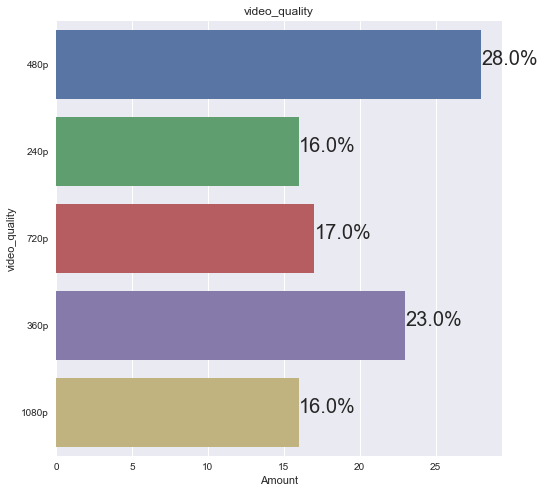

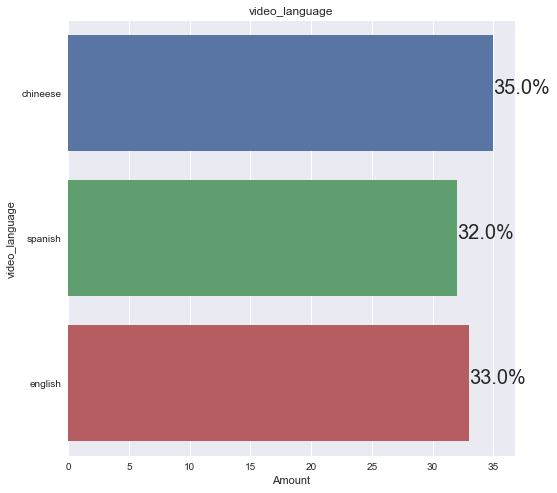

In [248]:
for col in cat:
    ax = sns.countplot(y=col, data=details)
    plt.title(col)
    plt.xlabel('Amount')

    total = len(details[col])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))

    plt.show()

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


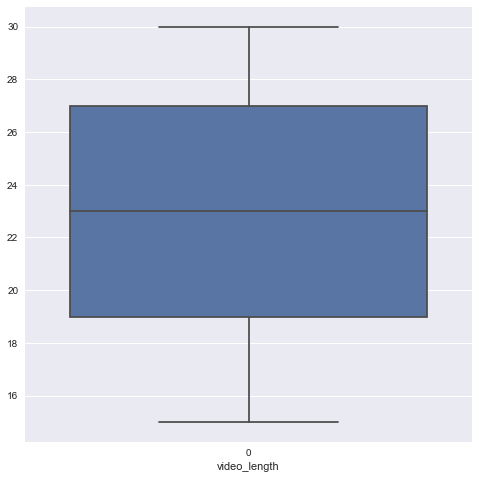

In [249]:
# Boxplot
sns.boxplot(data=details["video_length"])
plt.xlabel("video_length")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


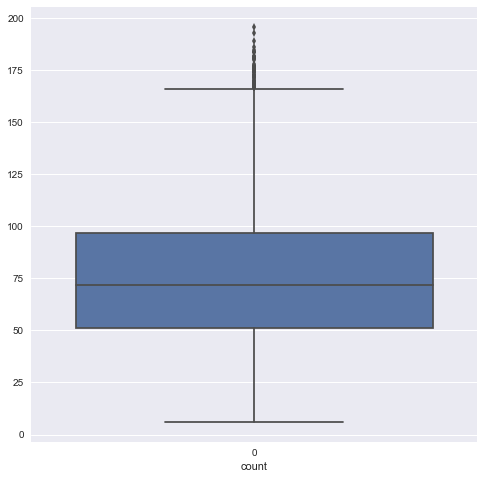

In [250]:
sns.boxplot(data=views["count"])
plt.xlabel("count")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Text(0, 0.5, 'Count')

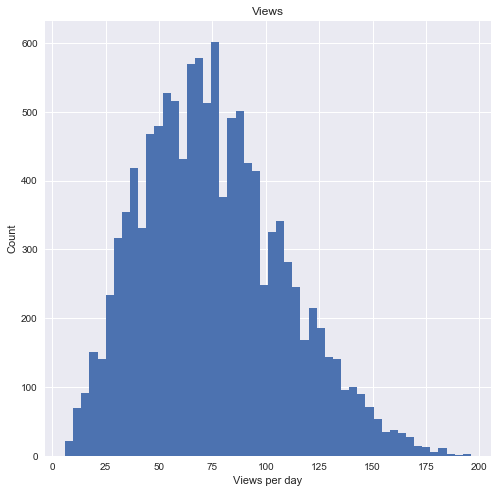

In [251]:
views['count'].hist(bins=50)
plt.title('Views')
plt.xlabel('Views per day')
plt.ylabel('Count')

### Check trends in time

In [252]:
views.date = pd.to_datetime(views.date)

In [253]:
views.date.min(), views.date.max()

(Timestamp('2017-09-03 00:00:00'), Timestamp('2018-02-27 00:00:00'))

In [254]:
views.date.max()-views.date.min()

Timedelta('177 days 00:00:00')

Text(0.5, 0, 'WeekDay')

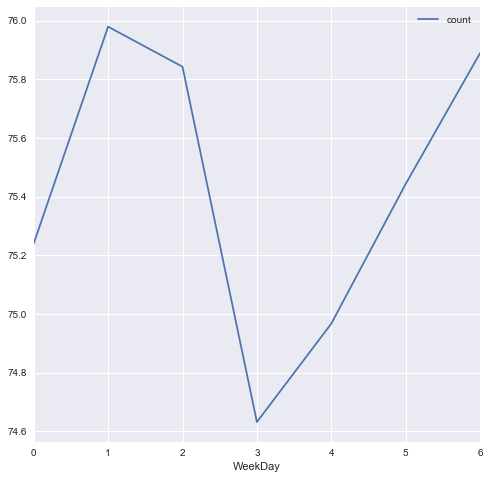

In [255]:
views[['date','count']].groupby(views.date.dt.weekday).mean().plot()
plt.xlabel('WeekDay')

Text(0.5, 0, 'WeekDay')

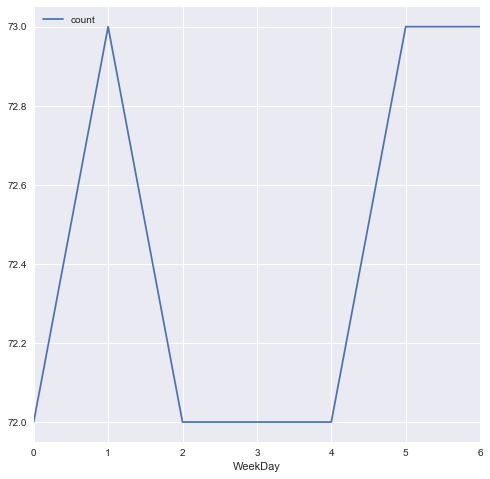

In [256]:
views[['date','count']].groupby(views.date.dt.weekday).median().plot()
plt.xlabel('WeekDay')

In [257]:
views.set_index('date', inplace=True)

In [262]:
v1=views[views["video_id"]==1]

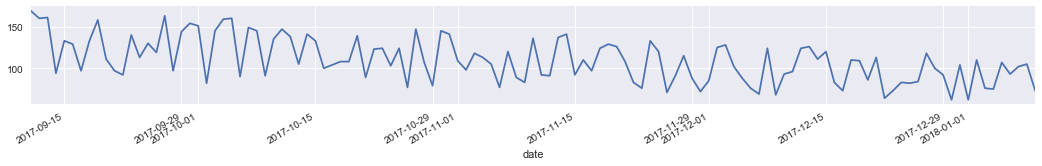

In [263]:
v1['count'].plot(figsize=(18, 2))
plt.show()

In [29]:
v2=views[views["video_id"]==2]

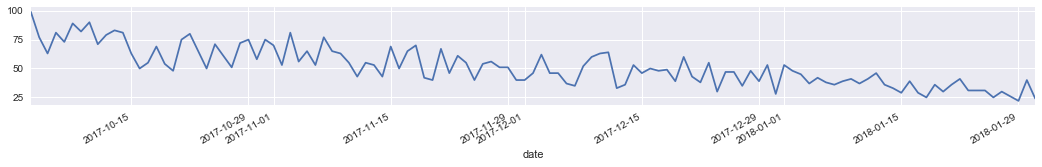

In [30]:
v2['count'].plot(figsize=(18, 2))
plt.show()

It seems that as time passes the number of views decreases

In [31]:
views = pd.read_csv('video_count.csv')

In [32]:
videos=pd.merge(views, details, how='inner', on="video_id", 
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [33]:
videos.head()

,video_id,date,count,video_length,video_language,video_upload_date,video_quality
0,1,2018-01-06,93,16,chineese,2017-09-11,480p
1,1,2017-10-04,159,16,chineese,2017-09-11,480p
2,1,2017-12-10,93,16,chineese,2017-09-11,480p
3,1,2017-09-16,129,16,chineese,2017-09-11,480p
4,1,2017-10-29,79,16,chineese,2017-09-11,480p


Daily views average of each video sorted according to the ascending order of their views

In [34]:
pd.DataFrame(videos.groupby('video_id')['count'].mean().sort_values(ascending=False).head())

,count
video_id,
57,131.479339
52,120.550847
74,120.222222
84,120.194915
44,120.075000


Views Average Description

In [35]:
pd.DataFrame(videos.groupby('video_id')['count'].mean().describe())

,count
count,100.000000
mean,75.446701
std,25.952585
min,29.025210
25%,53.819538
50%,74.685924
75%,95.551681
max,131.479339


Total number of views for a video

In [36]:
pd.DataFrame(videos.groupby('video_id')['count'].count().sort_values(ascending=False).head())

,count
video_id,
48,121
14,121
83,121
79,121
22,121


In [37]:
#Average views per day
videos_total_views = pd.DataFrame(videos.groupby('video_id')['count'].mean())

In [38]:
videos_total_views['n.of_published_days'] = pd.DataFrame(videos.groupby('video_id')['count'].count())
videos_total_views.head()

,count,n.of_published_days
video_id,,
1,109.975000,120
2,51.789916,119
3,29.025210,119
4,119.260504,119
5,101.537815,119


In [39]:
videos_merge=videos

In [40]:
videos_merge.rename(columns={'count':'n.of_views'}, inplace=True)

In [41]:
videos_merge.head()

,video_id,date,n.of_views,video_length,video_language,video_upload_date,video_quality
0,1,2018-01-06,93,16,chineese,2017-09-11,480p
1,1,2017-10-04,159,16,chineese,2017-09-11,480p
2,1,2017-12-10,93,16,chineese,2017-09-11,480p
3,1,2017-09-16,129,16,chineese,2017-09-11,480p
4,1,2017-10-29,79,16,chineese,2017-09-11,480p


In [42]:
videos_merge.groupby(['video_language'])['n.of_views'].describe()

,count,mean,std,min,25%,50%,75%,max
video_language,,,,,,,,
chineese,4169.0,74.166947,33.803932,8.0,48.0,71.0,97.0,181.0
english,3929.0,77.100534,32.440818,11.0,52.0,74.0,98.0,186.0
spanish,3805.0,75.081472,32.650963,6.0,51.0,72.0,96.0,196.0


Get weekday

In [43]:
videos_merge['date']=pd.to_datetime(videos_merge['date'])
videos_merge['weekday'] = videos_merge['date'].dt.dayofweek
videos_merge['weekday'] = videos_merge['weekday'].astype('category')

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


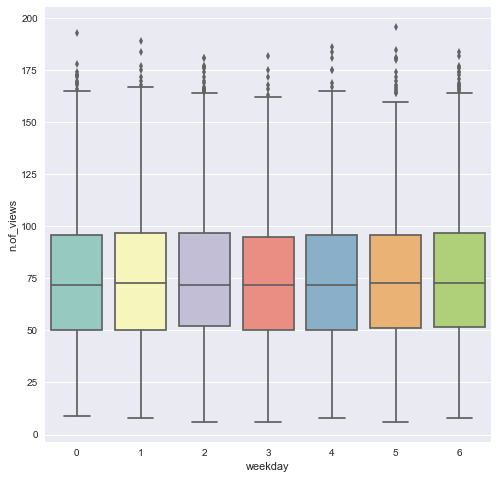

In [44]:
ax = sns.boxplot(x="weekday", y="n.of_views", data=videos_merge, palette="Set3")

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


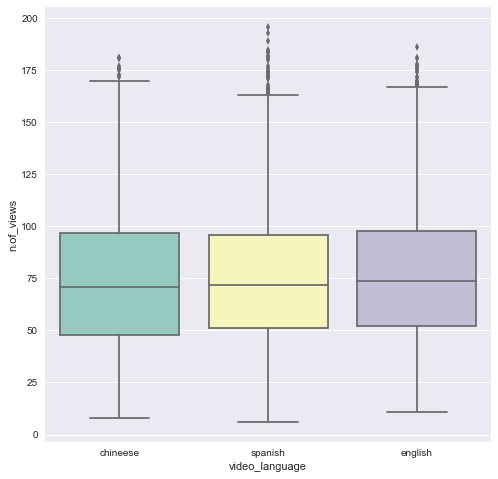

In [45]:
ax = sns.boxplot(x="video_language", y="n.of_views", data=videos_merge, palette="Set3")

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


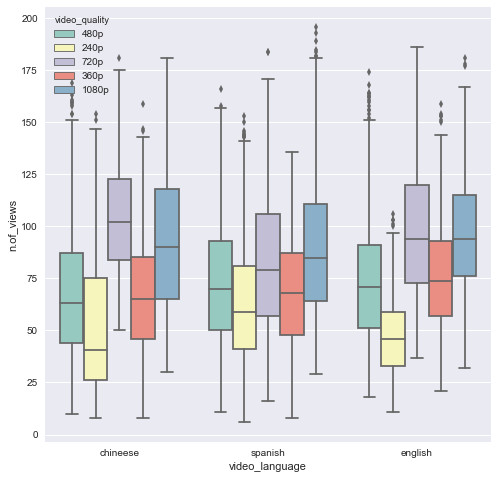

In [46]:
ax = sns.boxplot(x="video_language", y="n.of_views", hue="video_quality", data=videos_merge, palette="Set3")

Number of days of samples for the videos

Text(0, 0.5, 'Number of videos')

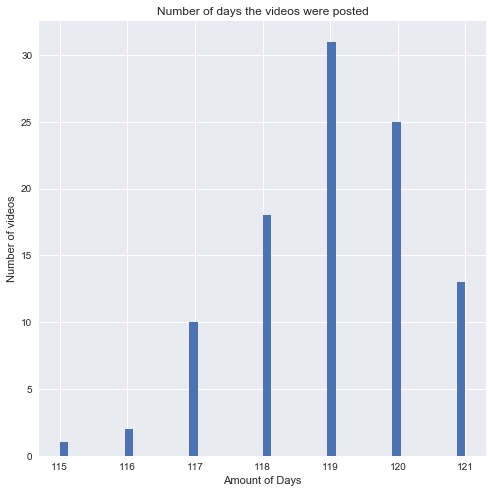

In [47]:
videos_total_views['n.of_published_days'].hist(bins=50)
plt.title('Number of days the videos were posted')
plt.xlabel('Amount of Days')
plt.ylabel('Number of videos')

Number of videos that are published on the same day

In [48]:
published_videos=pd.DataFrame(videos.groupby('date')['video_id'].count())
published_videos.head()

,video_id
date,
2017-09-03,3
2017-09-04,3
2017-09-05,3
2017-09-06,4
2017-09-07,5


Text(0, 0.5, 'Number of days')

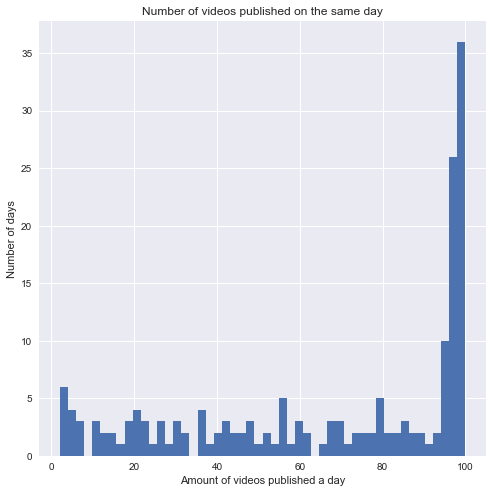

In [49]:
published_videos['video_id'].hist(bins=50)
plt.title('Number of videos published on the same day')
plt.xlabel('Amount of videos published a day')
plt.ylabel('Number of days')

Let's check the relationship between the amount of views per day and the length of the video

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


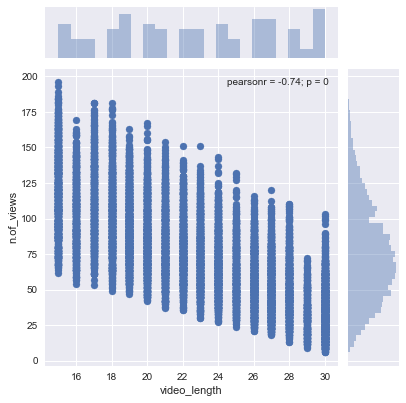

In [50]:
sns.jointplot(x='video_length', y='n.of_views', data=videos_merge)

In [51]:
videos_matrix=videos.pivot_table(index='date', columns='video_id', values='n.of_views')
videos_matrix.head()

video_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
date,,,,,,,,,,,,,,,,,,,,,
2017-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Moving Average - 3 days
Moving_average = videos_matrix.rolling(window=3).mean()
Moving_average=Moving_average.shift(1)
Moving_average.head()

video_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
date,,,,,,,,,,,,,,,,,,,,,
2017-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Exponential smoothing
exp=videos_matrix.ewm(span=12,min_periods=0,adjust=False).mean()
exp=exp.shift(1)
exp.head()

video_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
date,,,,,,,,,,,,,,,,,,,,,
2017-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Melting for reshape table
ma = pd.melt(Moving_average.reset_index(), id_vars=["date"], var_name="video_id", value_name="moving_avg")
exp_melt = pd.melt(exp.reset_index(), id_vars=["date"], var_name="video_id", value_name="exp")

In [55]:
ma.head()

,date,video_id,moving_avg
0,2017-09-03,1,NaN
1,2017-09-04,1,NaN
2,2017-09-05,1,NaN
3,2017-09-06,1,NaN
4,2017-09-07,1,NaN


In [56]:
videos_merge=pd.merge(ma, videos_merge, how='inner', on=["video_id" , "date"])
videos_merge=pd.merge(exp_melt, videos_merge, how='inner', on=["video_id" , "date"])

In [57]:
# Change quality feature to numric varianle
videos_merge['video_quality'] = videos_merge['video_quality'].map(lambda x: x.rstrip('p'))

In [58]:
videos_merge['video_quality'] = videos_merge['video_quality'].astype('int64')

In [59]:
videos_merge['video_language'] = videos_merge['video_language'].astype('category')

Get column with the number of days elapsed between last date and uploaded date

In [60]:
videos_merge['video_upload_date']=pd.to_datetime(videos_merge['video_upload_date'])

In [61]:
videos_merge['elapsed_days_from_uplaod']=videos_merge['date'].sub(videos_merge['video_upload_date'], axis=0)
videos_merge['elapsed_days_from_uplaod']=videos_merge['elapsed_days_from_uplaod'].dt.days

Let's check the relationship between the amount of views per day of a video and the number of days it is published on the website

Text(0, 0.5, 'Views_per_day')

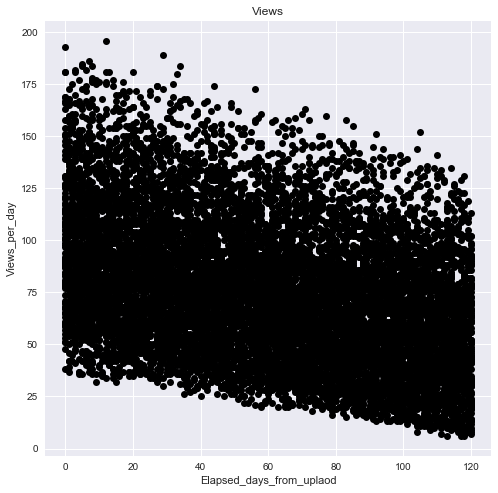

In [62]:
plt.plot(videos_merge['elapsed_days_from_uplaod'], videos_merge['n.of_views'], 'o', color='black');
plt.title('Views')
plt.xlabel('Elapsed_days_from_uplaod')
plt.ylabel('Views_per_day')

It seems that the number of views decreases when time from uplaod increases.

Text(0, 0.5, 'Views_per_day')

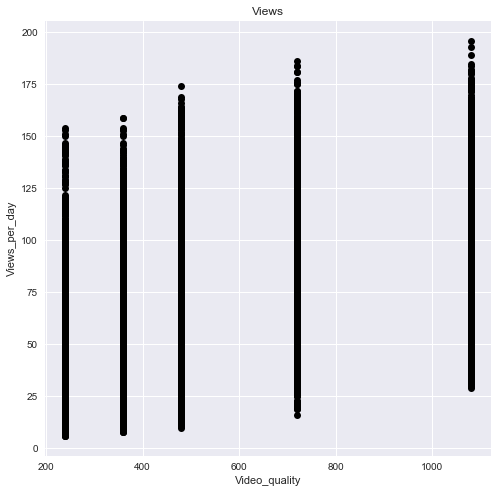

In [63]:
plt.plot(videos_merge['video_quality'], videos_merge['n.of_views'], 'o', color='black');
plt.title('Views')
plt.xlabel('Video_quality')
plt.ylabel('Views_per_day')

#### Correlation Matrix

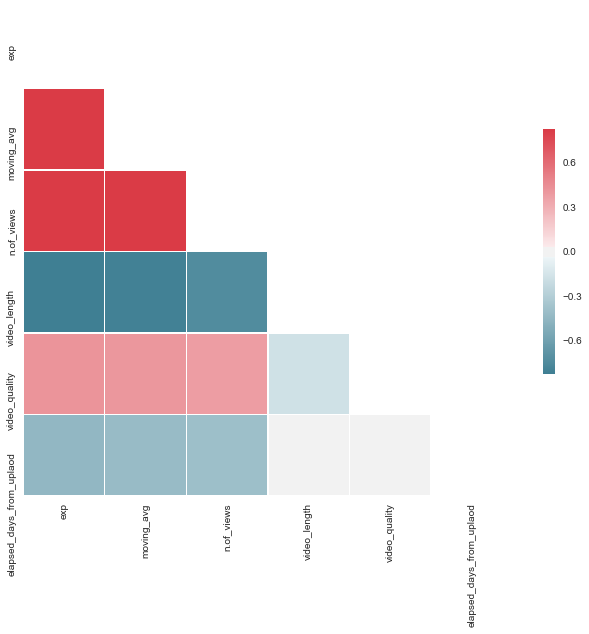

In [64]:
# Compute the correlation matrix for the numeric features
sns.set(style="white")

corr = videos_merge.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

It seems that the number of views is affected by the number of views from previous days (positive affect) and the video length (negative affect). 

In [65]:
co = corr.unstack()

Positive correlation

In [66]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor > 0.8])

0
n.of_views               moving_avg                0.834733
moving_avg               n.of_views                0.834733
n.of_views               exp                       0.859920
exp                      n.of_views                0.859920
moving_avg               exp                       0.975535
exp                      moving_avg                0.975535
                         exp                       1.000000
video_length             video_length              1.000000
n.of_views               n.of_views                1.000000
moving_avg               moving_avg                1.000000
video_quality            video_quality             1.000000
elapsed_days_from_uplaod elapsed_days_from_uplaod  1.000000

Negative correlation

In [67]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor < -0.8])

0
exp          video_length -0.823832
video_length exp          -0.823832
             moving_avg   -0.807272
moving_avg   video_length -0.807272

In [69]:
videos_merge['exp']=np.round(videos_merge['exp'], decimals=2)

In [70]:
videos_merge['moving_avg']=np.round(videos_merge['moving_avg'], decimals=2)

In [185]:
data=videos_merge.drop(['video_id','video_upload_date','date'], axis = 1)

Dealing with missing values

In [186]:
data['moving_avg']=data.apply(lambda x: x['n.of_views'] if pd.isnull(x['moving_avg']) else x['moving_avg'], axis=1)

In [187]:
data['exp']=data.apply(lambda x: x['n.of_views'] if pd.isnull(x['exp']) else x['exp'], axis=1)

In [188]:
num_columns = data._get_numeric_data().columns
numeric_data = data[num_columns]

#### Feature Importance

In [122]:
#import sys
#!{sys.executable} -m pip install catboost
from catboost import  Pool, CatBoostRegressor

categorical_features_indices = [3,6]
X = data.drop(['n.of_views'], axis = 1)  # independent columns
Y = data[['n.of_views']]  # target column
model = CatBoostRegressor(
    random_seed = 400,
    loss_function = 'RMSE',
    iterations=400,
)

# Train 
model.fit(X, Y, cat_features = categorical_features_indices)

0:	learn: 80.0464803	total: 94.4ms	remaining: 37.7s
1:	learn: 77.8025584	total: 231ms	remaining: 46s
2:	learn: 75.6261636	total: 431ms	remaining: 57s
3:	learn: 73.5220518	total: 608ms	remaining: 1m
4:	learn: 71.4726033	total: 847ms	remaining: 1m 6s
5:	learn: 69.4752391	total: 1.09s	remaining: 1m 11s
6:	learn: 67.5410689	total: 1.42s	remaining: 1m 19s
7:	learn: 65.6947501	total: 1.62s	remaining: 1m 19s
8:	learn: 63.9365764	total: 1.7s	remaining: 1m 14s
9:	learn: 62.1885882	total: 1.88s	remaining: 1m 13s
10:	learn: 60.5145017	total: 1.99s	remaining: 1m 10s
11:	learn: 58.8803142	total: 2.12s	remaining: 1m 8s
12:	learn: 57.3216354	total: 2.21s	remaining: 1m 5s
13:	learn: 55.7884599	total: 2.32s	remaining: 1m 3s
14:	learn: 54.3554752	total: 2.38s	remaining: 1m 1s
15:	learn: 52.9493620	total: 2.49s	remaining: 59.8s
16:	learn: 51.5631658	total: 2.59s	remaining: 58.3s
17:	learn: 50.2200860	total: 2.73s	remaining: 57.9s
18:	learn: 48.9463737	total: 2.79s	remaining: 56s
19:	learn: 47.6709135	tot

In [123]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
exp,51.640991
moving_avg,34.673090
video_length,9.385447
elapsed_days_from_uplaod,1.945504
video_quality,1.750833
video_language,0.425060
weekday,0.179075


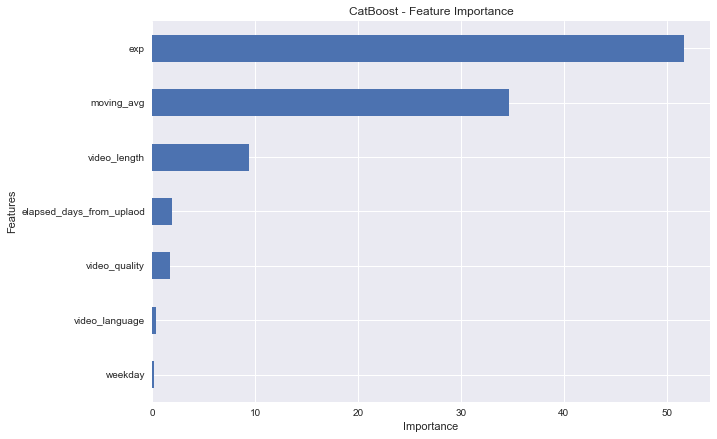

In [124]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

## Clustering

Deviding into 3 groups using the features that were chosen by the Impurity Index

In [125]:
#data=pd.get_dummies(data, columns=['video_language','weekday'])

In [126]:
#import category_encoders as ce
#encoder = ce.BinaryEncoder(cols = ['video_language'])
#encoder.fit_transform(videos_merge)

In [189]:
data=data.drop(['weekday','elapsed_days_from_uplaod', 'video_language','video_quality'], axis = 1)

Normalization

In [190]:
#Normalaize the data
data_norm=data.copy()
data_norm = (data_norm-data_norm.min())/(data_norm.max()-data_norm.min())

Model

In [191]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(data_norm)
y_kmeans = kmeans.predict(data_norm)
centers = kmeans.cluster_centers_

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


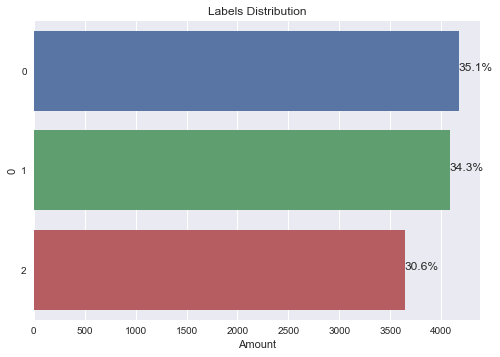

In [192]:
df=pd.DataFrame(y_kmeans)
ax = sns.countplot(y=df[0], data=df)
plt.title('Labels Distribution')
plt.xlabel('Amount')

total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [193]:
data['label']=y_kmeans

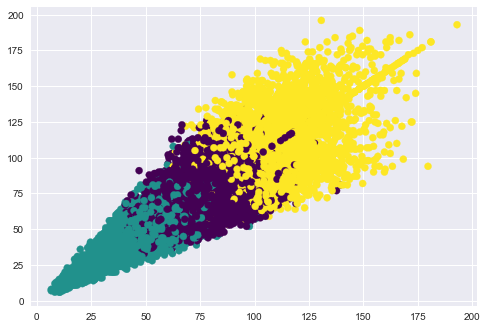

In [194]:
plt.scatter(data['moving_avg'], data['n.of_views'], c=data['label'], s=50, cmap='viridis')

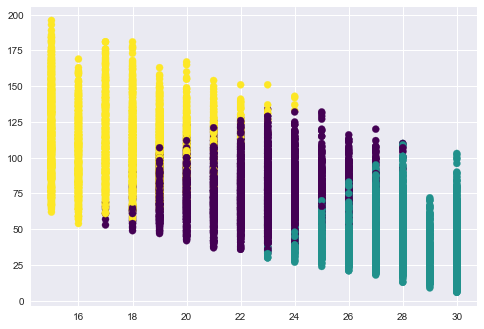

In [195]:
plt.scatter(data['video_length'], data['n.of_views'], c=data['label'], s=50, cmap='viridis')

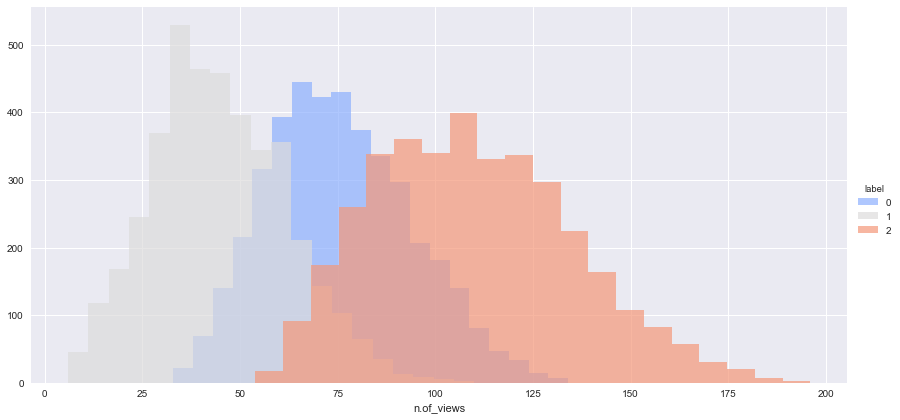

In [226]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="label",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'n.of_views',bins=20,alpha=0.7).add_legend()

In [228]:
pd.DataFrame(data.groupby("label")["n.of_views","exp"].describe())

n.of_views                                                           \
           count        mean        std   min    25%    50%    75%    max   
label                                                                       
0         4176.0   75.575431  18.159046  33.0  62.00   74.5   88.0  134.0   
1         4086.0   44.816936  17.120747   6.0  32.25   44.0   56.0  110.0   
2         3641.0  109.609997  25.207982  54.0  90.00  108.0  127.0  196.0   

          exp                                                                  
        count        mean        std    min      25%      50%     75%     max  
label                                                                          
0      4176.0   78.857888  13.539199  42.57  69.0475   79.000   87.92  133.60  
1      4086.0   47.819148  15.513034   9.26  37.3750   47.665   58.59  106.54  
2      3641.0  110.772829  17.691612  72.59  98.2900  108.670  121.26  193.00

In [229]:
pd.DataFrame(data.groupby("label")["video_length"].describe())

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,4176.0,22.318247,2.074657,17.0,21.0,22.0,24.0,28.0
1,4086.0,27.780225,1.767976,23.0,26.0,28.0,30.0,30.0
2,3641.0,17.449052,1.867801,15.0,16.0,18.0,19.0,24.0


"Hot" videos are characterized by 110 views per day in average and a video length of 17 sec (short videos). 
I would have used this information in order to raise the number of views per video by positioning the shortest videos in the "hot" places in the page. Additionaly, I would have publised a post-tips for people who are uploading a new video to create a short video that will be up to 17 sec long.

Another attitude is by granting bonuses to customers whose videos were up to 17 seconds long.

I would also suggest using an automated video editor that offers the customer an automatic video editing that shortens the video by up to 17 seconds.

#### Classification Model

In [91]:
data = data.drop(['n.of_views'], axis = 1) 

In [92]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X = data.drop(['label'], axis = 1)  # independent columns
Y = data[['label']]  # target column

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [93]:
model = CatBoostClassifier(loss_function='MultiClass')

In [96]:
# Train 
model.fit(train_X, train_Y)

0:	learn: -1.0510538	total: 112ms	remaining: 1m 52s
1:	learn: -1.0078898	total: 247ms	remaining: 2m 3s
2:	learn: -0.9681646	total: 348ms	remaining: 1m 55s
3:	learn: -0.9306121	total: 494ms	remaining: 2m 3s
4:	learn: -0.8954643	total: 591ms	remaining: 1m 57s
5:	learn: -0.8622493	total: 700ms	remaining: 1m 55s
6:	learn: -0.8318764	total: 794ms	remaining: 1m 52s
7:	learn: -0.8029518	total: 891ms	remaining: 1m 50s
8:	learn: -0.7760676	total: 1.01s	remaining: 1m 50s
9:	learn: -0.7504301	total: 1.13s	remaining: 1m 51s
10:	learn: -0.7257064	total: 1.24s	remaining: 1m 51s
11:	learn: -0.7032087	total: 1.34s	remaining: 1m 50s
12:	learn: -0.6803230	total: 1.44s	remaining: 1m 49s
13:	learn: -0.6596019	total: 1.54s	remaining: 1m 48s
14:	learn: -0.6401511	total: 1.65s	remaining: 1m 48s
15:	learn: -0.6220202	total: 1.79s	remaining: 1m 50s
16:	learn: -0.6046274	total: 1.88s	remaining: 1m 48s
17:	learn: -0.5876902	total: 1.95s	remaining: 1m 46s
18:	learn: -0.5706907	total: 2.04s	remaining: 1m 45s
19:	l

In [97]:
# Get predicted classes
preds_y = model.predict(test_X)

### Model Evaluation

<Figure size 576x396 with 0 Axes>

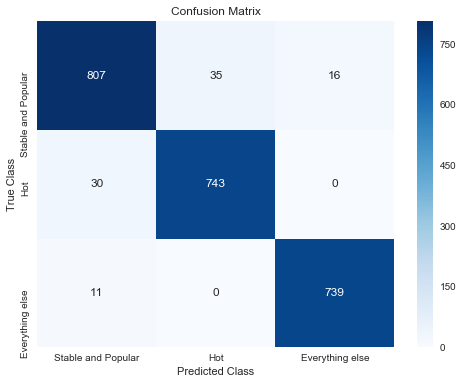

In [172]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

plt.figure()
cm = confusion_matrix(test_Y, preds_y) 
labels = ['Stable and Popular', 'Hot', 'Everything else']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Precision , Recall and F1 score

In [182]:
print("Recall: {0}".format(round(recall_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))

Recall: 0.9624


In [183]:
print("Precision: {0}".format(round(precision_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))

Precision: 0.9618


In [184]:
print("f1 score: {0}".format(round(f1_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))

f1 score: 0.9621
